# Sentiment Analysis using newsapi.org

# A. Data Preparation

In [ ]:
import pandas as pd 
import numpy as np 


#import nltk for natural language toolkit
import nltk 
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords


#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
 #!pip install newsapi-python

In [ ]:
 #!pip install nltk

In [ ]:
# !pip install textblob 
from textblob import TextBlob

## A.1 Getting dataset from newsapi.org

In [ ]:
# https://newsapi.org/v2/everything
import requests
API_URL = 'https://newsapi.org/v2/everything'
#API_URL = 'https://newsapi.org/v2/articles'
api_key = '3b38c190fdf241c9b4949588c3682983'
def extract_data(q,language,pageSize):
    #define the parameter that are needed
    data = {'q': q,
           'language': language ,
#            'domain':domain,
            'pageSize': pageSize,
           'apiKey': api_key}
    
    #call the api and store into json format
    response = requests.get(API_URL, data)
    data = response.json()
    
    data = pd.DataFrame(data['articles'])
    
        
    # store into dataframe
#     df = pd.DataFrame.from_dict(data, orient='index')
    return data

# Extract data keywords

In [ ]:
#data = extract_data('Farmers protest','en',100)

data = extract_data('Ratan Tata','en',100)



### A.1.1 Parse source name 

In [ ]:
test = data['source'].reset_index()

In [ ]:
test.head()

,index,source
0,0,"{'id': None, 'name': 'The Indian Express'}"
1,1,"{'id': None, 'name': 'The Indian Express'}"
2,2,"{'id': None, 'name': 'The Indian Express'}"
3,3,"{'id': None, 'name': 'Yahoo Entertainment'}"
4,4,"{'id': None, 'name': 'BBC News'}"


In [ ]:
for index in test.index :
   data['source'][index] = test['source'][index]['name']



In [ ]:
data.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,The Indian Express,Trends Desk,Ratan Tata arrives at Taj hotel in a Nano with...,Ratan Tata drove to the hotel in a custom-made...,https://indianexpress.com/article/trending/tre...,https://images.indianexpress.com/2022/05/ratan...,2022-05-19T05:19:24Z,Business tycoon Ratan Tata is much respected f...
1,The Indian Express,Trends Desk,‘Nano was meant for all our people’: Ratan Tat...,"""What really motivated me, and sparked a desir...",https://indianexpress.com/article/trending/tre...,https://images.indianexpress.com/2022/05/ratan...,2022-05-12T12:01:31Z,Tata Nano has been one of the most popular car...
2,The Indian Express,Express Web Desk,SC dismisses plea to review verdict on removal...,"The Supreme Court, however, agreed to discuss ...",https://indianexpress.com/article/business/com...,https://images.indianexpress.com/2022/05/ch955...,2022-05-19T07:00:08Z,The Supreme Court on Thursday dismissed an app...
3,Yahoo Entertainment,BBC,Ratan Tata: Tycoon's ride in India's cheapest ...,"When Ratan Tata recently rode in the Nano, he ...",https://news.yahoo.com/ratan-tata-tycoons-ride...,https://s.yimg.com/uu/api/res/1.2/vkdzN8F1JoXy...,2022-05-19T05:27:43Z,Ratan Tata during the inauguration of the car ...
4,BBC News,https://www.facebook.com/bbcnews,Ratan Tata: Tycoon's ride in India's cheapest ...,<ol><li>Ratan Tata: Tycoon's ride in India's c...,https://www.bbc.com/news/world-asia-india-6150...,https://ichef.bbci.co.uk/news/1024/branded_new...,2022-05-19T05:27:43Z,"Image caption, Ratan Tata during the inaugurat..."


In [ ]:
data.tail()

,source,author,title,description,url,urlToImage,publishedAt,content
62,Inventiva,anjalisidana,OLA Claims To Launch A Tesla Like Car In India...,Ola Electric has announced that it will enter ...,https://www.inventiva.co.in/stories/ola-scoote...,https://i0.wp.com/www.inventiva.co.in/wp-conte...,2022-05-03T09:39:50Z,Ola Electric has announced that it will enter ...
63,India TV News,India TV Trending Desk,Vir Das compares Elon Musk's Twitter deal with...,Elon Musk is seemingly going back and forth on...,https://www.indiatvnews.com/trending/news/vir-...,https://resize.indiatvnews.com/en/resize/newbu...,2022-05-14T18:17:43Z,Elon Musk said Friday that his plan to buy Twi...
64,Statetimes.in,Editor State Times,Govt to boost health infra to provide best tre...,DIBRUGARH: Prime Minister Narendra Modi on Thu...,https://web.statetimes.in/govt-to-boost-health...,https://web.statetimes.in/wp-content/uploads/2...,2022-04-28T15:56:34Z,DIBRUGARH: Prime Minister Narendra Modi on Thu...
65,Manipurfact.com,MF News Desk,Ayushman Bharat scheme helped in early detecti...,Dibrugarh (Assam) [India]: Prime Minister Nare...,https://manipurfact.com/ayushman-bharat-scheme...,https://manipurfact.com/wp-content/uploads/202...,2022-04-29T10:32:42Z,Dibrugarh (Assam) [India]: Prime Minister Nare...
66,Southasiaviews.com,sav_editor,PM Modi lays the foundation stone of seven new...,"Guwahati ( Assam) , April 28 : PM Narendra Mod...",https://southasiaviews.com/north-east-india/as...,https://southasiaviews.com/wp-content/uploads/...,2022-04-28T18:42:04Z,"Guwahati ( Assam) , April 28 : PM Narendra Mod..."


In [ ]:
#from google.colab import files
#data.to_csv('news_df.csv') 
#files.download("news_df.csv")

## B. Data Preprocessing

### B.1 Data Cleansing

In [ ]:
#cleansing 
def preprocessing(text):
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    def remove_between_square_brackets(text):
        return re.sub('-\[[^]]*\]', '', text)
    def denoise_text(text):
        text = strip_html(text)
        text = remove_between_square_brackets(text)
        return text
    def remove_punctuation(text):
        return re.sub(r'[^\w\s]', '', text)
    def remove_non_ascii(text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_punctuation(text)
    text = remove_non_ascii(text)
    
    return text.lower()

In [ ]:
import copy 

In [ ]:
df = copy.deepcopy(data[['description']])
df["description"]= df["description"].astype(str) 

In [ ]:
#apply the function
# df = data['content']
df['description'] = df['description'].progress_apply(preprocessing)


100%|██████████| 67/67 [00:00<00:00, 4703.63it/s]


In [ ]:
df.head()

,description
0,ratan tata drove to the hotel in a custommade ...
1,what really motivated me and sparked a desire ...
2,the supreme court however agreed to discuss an...
3,when ratan tata recently rode in the nano he r...
4,ratan tata tycoons ride in indias cheapest car...


## B.2 Basic Text Pre-processing

In [ ]:
dataframe = df

### 1. Lower Casing

In [ ]:
dataframe['description'] = dataframe['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe.head()

,description
0,ratan tata drove to the hotel in a custommade ...
1,what really motivated me and sparked a desire ...
2,the supreme court however agreed to discuss an...
3,when ratan tata recently rode in the nano he r...
4,ratan tata tycoons ride in indias cheapest car...


### 2. Punctuation removal

In [ ]:
dataframe['description'] = dataframe['description'].str.replace('[^\w\s]','')
dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,description
0,ratan tata drove to the hotel in a custommade ...
1,what really motivated me and sparked a desire ...
2,the supreme court however agreed to discuss an...
3,when ratan tata recently rode in the nano he r...
4,ratan tata tycoons ride in indias cheapest car...


### 3. Stopwords removal

In [ ]:
stop = stopwords.words('english')
dataframe['description'] = dataframe['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['description'].head()

0    ratan tata drove hotel custommade nano driven ...
1    really motivated sparked desire produce vehicl...
2    supreme court however agreed discuss delete ce...
3    ratan tata recently rode nano revived frenzy i...
4    ratan tata tycoons ride indias cheapest car wi...
Name: description, dtype: object

### 4. Frequent words removal

In [ ]:
freq = pd.Series(' '.join(dataframe['description']).split()).value_counts()[:10]
freq

tata         74
ratan        44
nano         22
cancer       18
assam        17
modi         17
car          14
said         13
dibrugarh    12
mistry       12
dtype: int64

In [ ]:
freq = list(freq.index)
dataframe['description'] = dataframe['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe.head()

,description
0,drove hotel custommade driven executive assistant
1,really motivated sparked desire produce vehicl...
2,supreme court however agreed discuss delete ce...
3,recently rode revived frenzy indias affordable
4,tycoons ride indias cheapest wins internet bbc...


### 5. Rare words removal

In [ ]:
rare_word = pd.Series(' '.join(dataframe['description']).split()).value_counts()[-20:]
rare_word

popular            1
remained           1
deletion           1
ramana             1
v                  1
n                  1
justice            1
headed             1
bench              1
resolution         1
ordinary           1
votes              1
50                 1
needed             1
term               1
second             1
reappointment      1
chandrasekarans    1
proposal           1
hospit             1
dtype: int64

In [ ]:
rare_word = list(rare_word.index)
dataframe['description'] = dataframe['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe.head()

,description
0,drove hotel custommade driven executive assistant
1,really motivated sparked desire produce vehicl...
2,supreme court however agreed discuss delete ce...
3,recently rode revived frenzy indias affordable
4,tycoons ride indias cheapest wins internet bbc...


### 6. Spelling Correction

In [ ]:
dataframe['description'].apply(lambda x: str(TextBlob(x).correct()))
dataframe['description'].head()

0    drove hotel custommade driven executive assistant
1    really motivated sparked desire produce vehicl...
2    supreme court however agreed discuss delete ce...
3       recently rode revived frenzy indias affordable
4    tycoons ride indias cheapest wins internet bbc...
Name: description, dtype: object

### 7. Tokenization

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
TextBlob(dataframe['description'][1]).words

WordList(['really', 'motivated', 'sparked', 'desire', 'produce', 'vehicle', 'constantly', 'seeing', 'indian', 'families', 'scooters', 'maybe', 'child', 'sandwiched', 'mother', 'father', 'wrote'])

### 9. Lematization

In [ ]:
from textblob import Word
dataframe['description'] = dataframe['description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['description'].head()

0    drove hotel custommade driven executive assistant
1    really motivated sparked desire produce vehicl...
2    supreme court however agreed discus delete cer...
3        recently rode revived frenzy india affordable
4    tycoon ride india cheapest win internet bbc vi...
Name: description, dtype: object

## C. Data Exploration

### C.1. Basic Feature Extraction

### 1. Number of words


In [ ]:
dataframe['word_count'] = dataframe['description'].apply(lambda x: len(str(x).split(" ")))
dataframe.head()

,description,word_count
0,drove hotel custommade driven executive assistant,6
1,really motivated sparked desire produce vehicl...,17
2,supreme court however agreed discus delete cer...,10
3,recently rode revived frenzy india affordable,6
4,tycoon ride india cheapest win internet bbc vi...,23


### 2. Number of character

In [ ]:
dataframe['char_count'] = dataframe['description'].str.len()
dataframe.head()

,description,word_count,char_count
0,drove hotel custommade driven executive assistant,6,49
1,really motivated sparked desire produce vehicl...,17,130
2,supreme court however agreed discus delete cer...,10,73
3,recently rode revived frenzy india affordable,6,45
4,tycoon ride india cheapest win internet bbc vi...,23,151


### 3. Number of stopword

In [ ]:
# stopword already trim
stop = stopwords.words('english')
dataframe['stopwords'] = dataframe['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataframe.head()

,description,word_count,char_count,stopwords
0,drove hotel custommade driven executive assistant,6,49,0
1,really motivated sparked desire produce vehicl...,17,130,0
2,supreme court however agreed discus delete cer...,10,73,0
3,recently rode revived frenzy india affordable,6,45,0
4,tycoon ride india cheapest win internet bbc vi...,23,151,0


## C.2 Labeling Using Polarity (Textblob)

### 1. New Dataframe

In [ ]:
#new df after removed duplicate text
new_df = copy.deepcopy(dataframe)
new_df.head()

#sentiment labeling 
text = new_df.description
text.head()

0    drove hotel custommade driven executive assistant
1    really motivated sparked desire produce vehicl...
2    supreme court however agreed discus delete cer...
3        recently rode revived frenzy india affordable
4    tycoon ride india cheapest win internet bbc vi...
Name: description, dtype: object

### 2. Labeling

In [ ]:
new_df.head(20)

,description,word_count,char_count,stopwords
0,drove hotel custommade driven executive assistant,6,49,0
1,really motivated sparked desire produce vehicl...,17,130,0
2,supreme court however agreed discus delete cer...,10,73,0
3,recently rode revived frenzy india affordable,6,45,0
4,tycoon ride india cheapest win internet bbc vi...,23,151,0
5,watch arrive taj mahal hotel customised electr...,21,143,0
6,visit taj hotel without bodyguard netizens hai...,21,150,0
7,seen customised electric around 1000 launched,6,45,0
8,dedicate last year health say time india dedic...,20,113,0
9,say grateful sc reject plea review order cyrus...,28,173,0


In [ ]:
text

0     drove hotel custommade driven executive assistant
1     really motivated sparked desire produce vehicl...
2     supreme court however agreed discus delete cer...
3         recently rode revived frenzy india affordable
4     tycoon ride india cheapest win internet bbc vi...
                            ...                        
62    ola electric announced enter indian autonomous...
63    elon musk seemingly going back forth twitter a...
64    prime minister narendra thursday government co...
65    india prime minister narendra thursday april 2...
66    guwahati april 28 pm narendra dedicated nation...
Name: description, Length: 67, dtype: object

In [ ]:
#Function for subjectivity
def getSubjectivity(description):
  return TextBlob(description).sentiment.subjectivity
  #Function for polarity
def getPolarity(description):
  return TextBlob(description).sentiment.polarity
  #Create two new columns
new_df['Subjectivity'] = new_df['description'].apply(getSubjectivity)
new_df['Polarity']= new_df['description'].apply(getPolarity)
 #Show new dataframe
new_df.head()

,description,word_count,char_count,stopwords,Subjectivity,Polarity
0,drove hotel custommade driven executive assistant,6,49,0,0.000000,0.000000
1,really motivated sparked desire produce vehicl...,17,130,0,0.266667,0.100000
2,supreme court however agreed discus delete cer...,10,73,0,0.571429,0.214286
3,recently rode revived frenzy india affordable,6,45,0,0.250000,0.000000
4,tycoon ride india cheapest win internet bbc vi...,23,151,0,0.400000,0.800000


In [ ]:
#new_df.drop(['word_count','char_count','stopwords','sentiment'],axis=1)

In [ ]:
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score ==0:
    return 'Neural'
  else:
    return 'Positive'
new_df['Analysis'] = new_df['Polarity'].apply(getAnalysis)


new_df

,description,word_count,char_count,stopwords,Subjectivity,Polarity,Analysis
0,drove hotel custommade driven executive assistant,6,49,0,0.000000,0.000000,Neural
1,really motivated sparked desire produce vehicl...,17,130,0,0.266667,0.100000,Positive
2,supreme court however agreed discus delete cer...,10,73,0,0.571429,0.214286,Positive
3,recently rode revived frenzy india affordable,6,45,0,0.250000,0.000000,Neural
4,tycoon ride india cheapest win internet bbc vi...,23,151,0,0.400000,0.800000,Positive
...,...,...,...,...,...,...,...
62,ola electric announced enter indian autonomous...,17,129,0,0.408333,0.266667,Positive
63,elon musk seemingly going back forth twitter a...,20,138,0,0.566667,-0.133333,Negative
64,prime minister narendra thursday government co...,19,172,0,0.316667,0.583333,Positive
65,india prime minister narendra thursday april 2...,24,165,0,0.550000,0.250000,Positive


### 3. Aggregation Sentimentclass

In [ ]:
#count sentiment 
sentiment = new_df.groupby(['Analysis'])['Analysis'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['cnt'] = chart['Analysis']
chart.drop(['Analysis'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['cnt']/chart['cnt'].sum()
chart

,Analysis,cnt,percent
0,Negative,4,0.059701
1,Neural,25,0.373134
2,Positive,38,0.567164


### 4. Visualization 

#### 4.1 Barchart

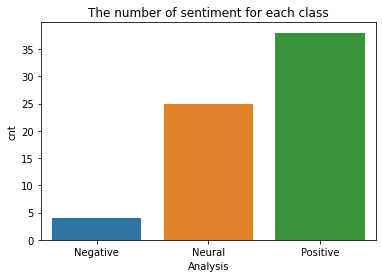

In [ ]:
#make a barchar
ax = sns.barplot(x= 'Analysis', y='cnt', data=chart)
ax = ax.set_title('The number of sentiment for each class') 

#### 4.2 Pie Chart

(-1.2567532882119627,
 1.1165813288512705,
 -1.2760697639874332,
 1.1110581258626469)

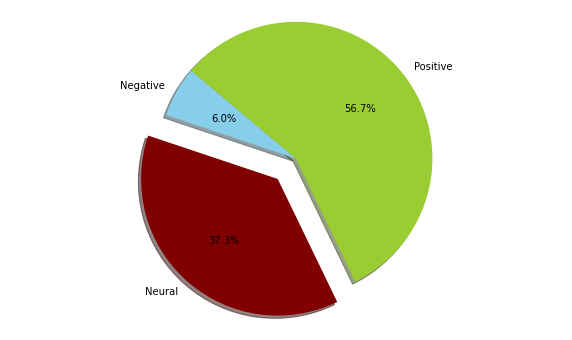

In [ ]:
colors = [ 'skyblue','maroon','yellowgreen']
explode = (0, 0.2, 0)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['cnt'], explode=explode, labels=chart['Analysis'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

***


In [ ]:
dataframe['source'] = data[['source']]

In [ ]:
cnt_source = dataframe.groupby(dataframe['source']).count()
cnt_source
chart = pd.DataFrame(cnt_source)
# chart['source'] = chart['source']
# chart.drop(['source'], axis = 1, inplace = True )
# chart = chart.reset_index()
chart['percent'] = chart['description']/chart['description'].sum()*100
chart = chart.reset_index()
chart
# chart

,source,description,word_count,char_count,stopwords,percent
0,BBC News,2,2,2,2,2.985075
1,Business Standard,4,4,4,4,5.970149
2,Business Today,4,4,4,4,5.970149
3,CarToq.com,1,1,1,1,1.492537
4,Carandbike.com,1,1,1,1,1.492537
5,Forbes,1,1,1,1,1.492537
6,Hindustan Times,2,2,2,2,2.985075
7,Independent,1,1,1,1,1.492537
8,India TV News,2,2,2,2,2.985075
9,India.com,2,2,2,2,2.985075


### Top News Portal Mentioned 

Text(0.5, 1.0, 'Top News Portal Mentioned Schools after Covid')

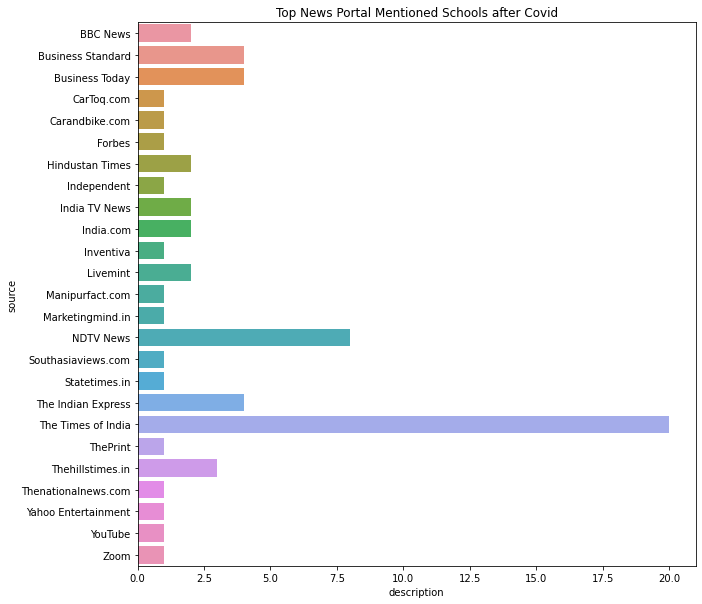

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x= 'description', y='source' ,data=chart)
ax.set_title('Top News Portal Mentioned Schools after Covid')

In [ ]:
#text = happy.Description
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
#define positive and negatif
positive = df.loc[new_df['Analysis']=='Positive' ]
negative  = df.loc[new_df['Analysis']=='Negative' ]
positive.head()

,description,word_count,char_count,stopwords,source
1,really motivated sparked desire produce vehicl...,17,130,0,The Indian Express
2,supreme court however agreed discus delete cer...,10,73,0,The Indian Express
4,tycoon ride india cheapest win internet bbc vi...,23,151,0,BBC News
8,dedicate last year health say time india dedic...,20,113,0,The Times of India
9,say grateful sc reject plea review order cyrus...,28,173,0,Hindustan Times


In [ ]:
all_positive = "".join(positive['description'].values)
all_negative = "".join(negative['description'].values)
# positive[['description']].values

### WORD CLOUD

### Positive Sentiment

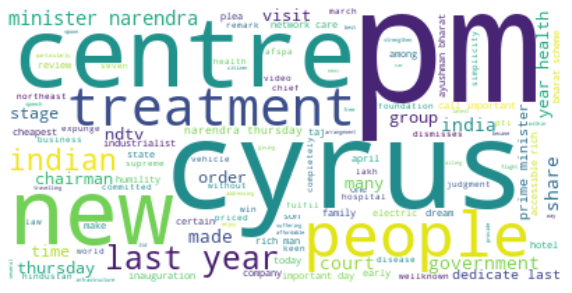

In [ ]:
plt.figure(figsize=(10,10))
create_word_cloud(all_positive)

### Negative Sentiment

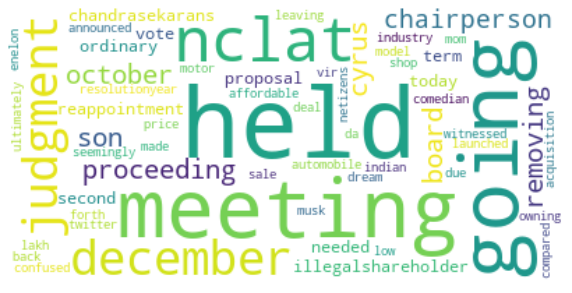

In [ ]:
plt.figure(figsize=(10,10))
create_word_cloud(all_negative)

# IBM Watson Tone Analysis

In [ ]:
#!pip install ibm_watson

In [ ]:
#apikey = 'rpYo_mFGTpwNPhDtO6dUt0RC2ZVogeJEbTm84hSeTBsi'
#url = 'https://api.eu-gb.tone-analyzer.watson.cloud.ibm.com/instances/06bc468a-cb39-4ebb-8047-aba880035970'

In [ ]:
#apikey = 'ueGx_4MZ_cDmX6XrGq9tV-2-0xdce8qg8mS7QBY9R4tK'
#url = 'https://api.eu-gb.tone-analyzer.watson.cloud.ibm.com/instances/462d8c14-f1ee-4b2b-bab0-8bbf071a8000'

In [ ]:
#apikey = 'eoO_REvBZILkfPFC1kXlj65ika3peB-670d7_gWMEjL1'
#url = 'https://api.eu-gb.tone-analyzer.watson.cloud.ibm.com/instances/f16ea3e6-11a2-4acc-97b8-dd88b8b6706e'

In [ ]:
#apikey = 'TSTxeQ1df9dHbHp577Fdw5GAMa2DR-dgTKDYRTGVpGez'

#url = 'https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/83d12701-883d-4dc5-a441-32b6f18a81bd'

In [ ]:
#from ibm_watson import ToneAnalyzerV3
#from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [ ]:
#authenticator = IAMAuthenticator(apikey)
#ta = ToneAnalyzerV3(version='2017-09-21', authenticator=authenticator)
#ta.set_service_url(url)

In [ ]:
#result =[]
#for i in new_df['description']:
 #  tone_analysis = ta.tone(
  #     {'text': i},
     #  'application/json'
  # ).get_result()
   #result.append(tone_analysis)

In [ ]:
#result

In [ ]:
#new_df.drop(['word_count','char_count','stopwords'],axis=1)

In [ ]:
#def f(i):
 #   x = ta.tone({'text': i}).get_result()['document_tone']['tones']
  #  return pd.Series({f'{k}_{i}': v for i, y in enumerate(x) 
   #                   for k, v in y.items()}, dtype=object)

In [ ]:
#final_df = new_df['description'].apply(f)
#print (final_df)

In [ ]:
#final_df

In [ ]:
#from google.colab import files
#df.to_csv("final_df.csv") 
#files.download("final_df.csv")

In [ ]:
#sns.countplot(final_df['tone_name_0'],label="Count")
#plt.show()